In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, load_iris, make_swiss_roll
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from sklearn.neighbors import kneighbors_graph, NearestNeighbors
from itertools import product

# Grupowanie k-średnich

## Przykład 1: jednorodne grupy z rozkładu normalnego

Dla danych jednorodne grupy z rozkładu normalnego wykonaj grupowanie k-średnich dla k=3 i 
przedstaw wyniki na wykresie. Na wykres nanieś także środki znalezionych klastrów.
Sprawdź jak dane zostaną pogrupowane dla k=2 i k=5.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [2]:
rng = np.random.default_rng(seed=7)

X = np.vstack([rng.multivariate_normal([0, 0], [[1, 0], [0, 1]], 50),
               rng.multivariate_normal([3, 8], [[1, 0], [0, 1]], 50),
               rng.multivariate_normal([6, 4], [[1, 0], [0, 1]], 50)])

In [3]:
type(X)

numpy.ndarray

In [4]:
X.shape

(150, 2)

In [5]:
X[:5]

array([[ 1.23015336e-03,  2.98745538e-01],
       [-2.74137855e-01, -8.90591839e-01],
       [-4.54670785e-01, -9.91646555e-01],
       [ 6.01436026e-02,  1.34021525e+00],
       [-4.92206519e-01, -6.20474900e-01]])

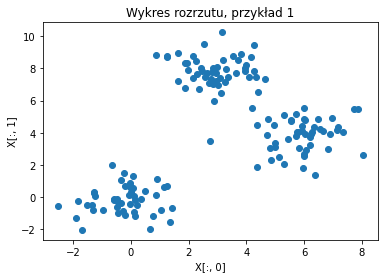

In [6]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Wykres rozrzutu, przykład 1")
plt.xlabel("X[:, 0]")
plt.ylabel("X[:, 1]")
plt.show()

In [7]:
model1 = KMeans(n_clusters=3, n_init=10, random_state=7)

model1.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=7)

In [8]:
labels1 = model1.labels_
print(labels1)  # wynika do ze sposobu wygenerowania badanego rozkładu

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
# inny sposób
print(model1.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


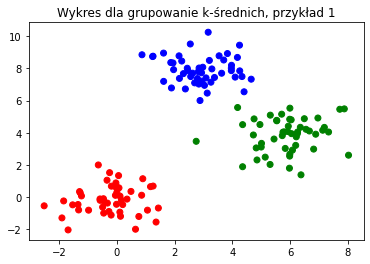

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=np.array(["red", "blue", "green"])[np.array(labels1)])
plt.title("Wykres dla grupowanie k-średnich, przykład 1")
plt.show()

In [11]:
centers1 = model1.cluster_centers_  # środki klastrów
print(centers1)

[[-0.22430886 -0.12155112]
 [ 2.924847    7.89316515]
 [ 5.88338314  3.85328103]]


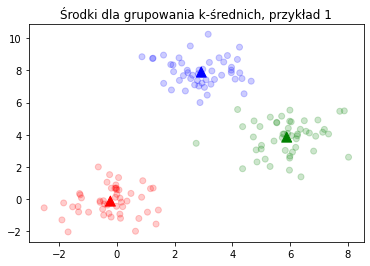

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=np.array(["red", "blue", "green"])[np.array(labels1)], alpha=0.2)
plt.scatter(centers1[:, 0], centers1[:, 1], marker="^", c=["red", "blue", "green"], s=100)

plt.title("Środki dla grupowania k-średnich, przykład 1")
plt.show()

In [13]:
model1 = KMeans(n_clusters=3, n_init=10, random_state=7, verbose=1)
model1.fit(X)

Initialization complete
Iteration 0, inertia 465.3906265701568.
Iteration 1, inertia 254.53824887280138.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 377.13172893966424.
Iteration 1, inertia 254.7940226056861.
Iteration 2, inertia 254.5382488728014.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 406.10510587272285.
Iteration 1, inertia 254.7940226056861.
Iteration 2, inertia 254.53824887280138.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 442.3025649848913.
Iteration 1, inertia 254.53824887280138.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 389.21674069695325.
Iteration 1, inertia 255.9475769916928.
Iteration 2, inertia 254.53824887280138.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 501.6518399674454.
Iteration 1, inertia 254.5382488728014.
Converged at iterat

KMeans(n_clusters=3, n_init=10, random_state=7, verbose=1)

Text(0.5, 1.0, '5 klastrów')

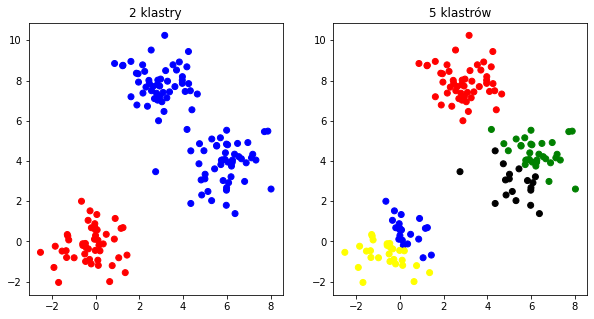

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

model2 = KMeans(n_clusters=2, n_init=10, random_state=7)
model2.fit(X)
labels2 = model2.labels_

model3 = KMeans(n_clusters=5, n_init=10, random_state=7)
model3.fit(X)
labels3 = model3.labels_

axes[0].scatter(X[:, 0], X[:, 1], c=np.array(["red", "blue"])[np.array(labels2)])
axes[0].set_title("2 klastry")

axes[1].scatter(X[:, 0], X[:, 1], c=np.array(["red", "blue", "green", "black", "yellow"])[np.array(labels3)])
axes[1].set_title("5 klastrów")


## Ćwiczenie 1: jednorodne grupy z rozkładu normalnego 2

Wygeneruj poniższe dane i wykonaj grupowanie k-średnich. Zwizualizuj wyniki.

In [15]:
rng = np.random.default_rng(seed=7)

X = np.vstack([rng.multivariate_normal([0, 0], [[1, 0], [0, 1]], 30),
               rng.multivariate_normal([-5,-5], [[1, 0], [0, 1]], 30),
               rng.multivariate_normal([5, 5], [[1, 0], [0, 1]], 30),
               rng.multivariate_normal([4, -2], [[1, 0], [0, 1]], 30)])

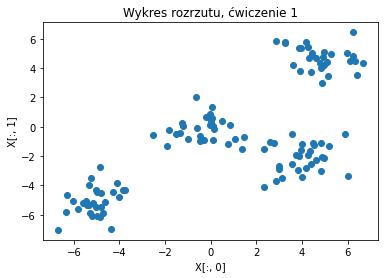

In [16]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Wykres rozrzutu, ćwiczenie 1")
plt.xlabel("X[:, 0]")
plt.ylabel("X[:, 1]")
plt.show()

In [17]:
model3 = KMeans(n_clusters=4, n_init=10, random_state=7)

model3.fit(X)
labels3 = model3.labels_
centers3 = model3.cluster_centers_

print(labels3)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3]


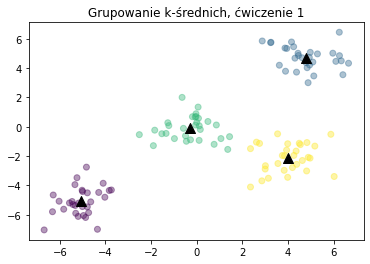

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=labels3, alpha=0.4)
plt.scatter(centers3[:, 0], centers3[:, 1], marker="^", c="black", s=100)

plt.title("Grupowanie k-średnich, ćwiczenie 1")
plt.show()

## Przykład 2: skalowanie danych

Wygeneruj poniższe dane i wykonaj grupowanie k-średnich. Zwizualizuj wyniki.

In [19]:
rng = np.random.default_rng(seed=7)

X = np.vstack([rng.multivariate_normal([0, 0], [[1, 0], [0, 300]], 30),
               rng.multivariate_normal([-8, -8], [[1, 0], [0, 200]], 30)])

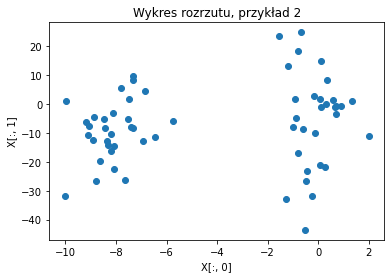

In [20]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Wykres rozrzutu, przykład 2")
plt.xlabel("X[:, 0]")
plt.ylabel("X[:, 1]")
plt.show()

In [21]:
model4 = KMeans(n_clusters=2, n_init=10, random_state=7)

model4.fit(X)
labels4 = model4.labels_
centers4 = model4.cluster_centers_

print(labels4)  # UWAGA: dane są przemieszane, ale były generowane po kolei!

[1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1]


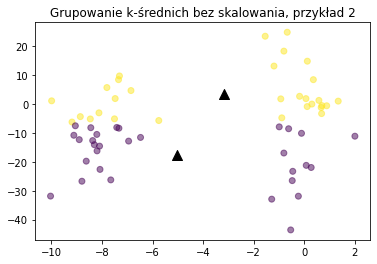

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=labels4, alpha=0.5)
plt.scatter(centers4[:, 0], centers4[:, 1], marker="^", c="black", s=100)

plt.title("Grupowanie k-średnich bez skalowania, przykład 2")
plt.show()

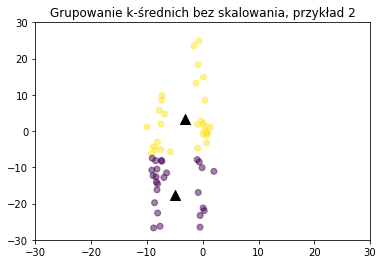

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=labels4, alpha=0.5)
plt.scatter(centers4[:, 0], centers4[:, 1], marker="^", c="black", s=100)

plt.title("Grupowanie k-średnich bez skalowania, przykład 2")
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.show()

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model5 = KMeans(n_clusters=2, n_init=10, random_state=7)

model5.fit(X_scaled)
labels5 = model5.labels_
centers5 = model5.cluster_centers_

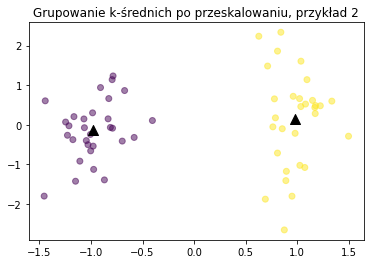

In [25]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels5, alpha=0.5)
plt.scatter(centers5[:, 0], centers5[:, 1], marker="^", c="black", s=100)

plt.title("Grupowanie k-średnich po przeskalowaniu, przykład 2")
plt.show()

## Ćwiczenie 2: awarie k-średnich

Dla danych X1 i X2 wykonaj skalowanie i grupowanie k-średnich dla odpowiedniej liczby grup. Zwizualizuj wyniki. Dlaczego algorytm k-średnich nie poradził sobie z grupowaniem?

In [26]:
noisy_moons = make_moons(n_samples=500, noise=0.05)
varied_normal = make_blobs(n_samples=500, cluster_std=[1.0, 2.5, 0.5], random_state=170)

X1 = noisy_moons[0]
X2 = varied_normal[0]

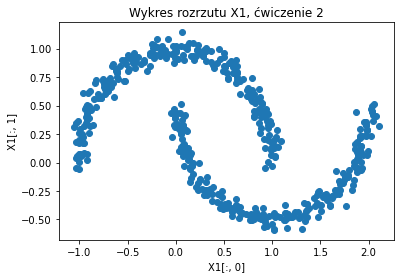

In [27]:
plt.scatter(X1[:, 0], X1[:, 1])
plt.title("Wykres rozrzutu X1, ćwiczenie 2")
plt.xlabel("X1[:, 0]")
plt.ylabel("X1[:, 1]")
plt.show()

In [28]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

model1 = KMeans(n_clusters=2, n_init=10, random_state=7)

model1.fit(X1)
labels1 = model1.labels_
centers1 = model1.cluster_centers_

print(centers1)

[[-0.72457533  0.77736533]
 [ 0.74813876 -0.80264551]]


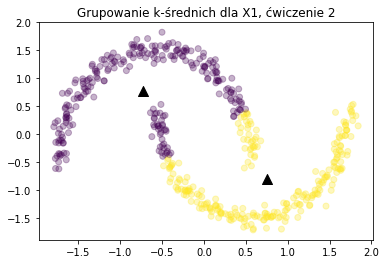

In [29]:
# algorytm wymaga zbiorów wypukłych!

plt.scatter(X1[:, 0], X1[:, 1], c=labels1, alpha=0.3)
plt.scatter(centers1[:, 0], centers1[:, 1], marker="^", c="black", s=100)

plt.title("Grupowanie k-średnich dla X1, ćwiczenie 2")
plt.show()

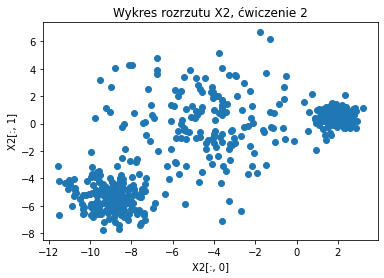

In [30]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.title("Wykres rozrzutu X2, ćwiczenie 2")
plt.xlabel("X2[:, 0]")
plt.ylabel("X2[:, 1]")
plt.show()

In [31]:
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

model2 = KMeans(n_clusters=3, n_init=10, random_state=7)

model2.fit(X2)
labels2 = model2.labels_
centers2 = model2.cluster_centers_

print(centers2)

[[ 1.14319337  0.65527471]
 [-1.0047252  -1.14240641]
 [-0.21067215  0.8217842 ]]


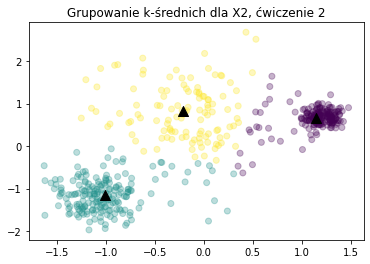

In [32]:
# punkty ze zwartych klastrów są zabierane przez klaster i dużej wariancji!

plt.scatter(X2[:, 0], X2[:, 1], c=labels2, alpha=0.3)
plt.scatter(centers2[:, 0], centers2[:, 1], marker="^", c="black", s=100)

plt.title("Grupowanie k-średnich dla X2, ćwiczenie 2")
plt.show()

Obejrzyj inne przykładowe zbiory danych i sprawdź jak radzi sobie z nimi algorytm k-średnich (`MiniBatch Kmeans`).

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

# Wybór k w k-średnich

## Przykład 3: `Irysy`

Dla danych `Irysy` znajdź liczbę klastrów i wykonaj grupowanie k-średnich. Zwizualizuj wyniki.

https://en.wikipedia.org/wiki/Iris_flower_data_set

https://www.math.umd.edu/~petersd/666/html/iris_pca.html

In [33]:
iris = load_iris()

### Eksploracja danych

In [34]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
iris_df.describe()  # dane nie są przeskalowane

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


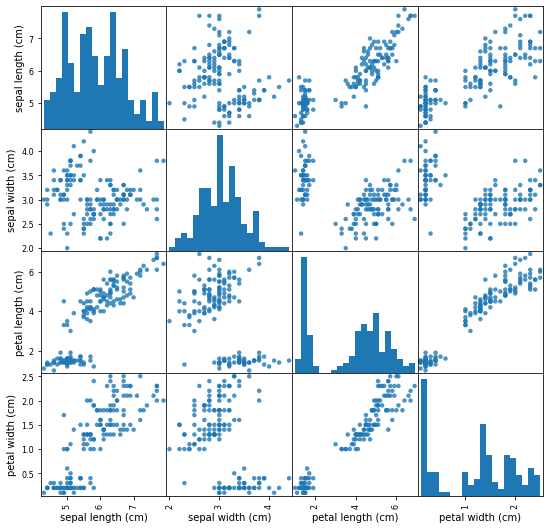

In [36]:
pd.plotting.scatter_matrix(iris_df, figsize=(9, 9), marker="o", hist_kwds={"bins": 20}, s=20, alpha=0.8)
plt.show()

### Przypomnienie: PCA (Principal Component Analysis)

In [37]:
X_scaled = StandardScaler().fit_transform(iris.data)  # PCA również wymaga skalowanie danych

In [38]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

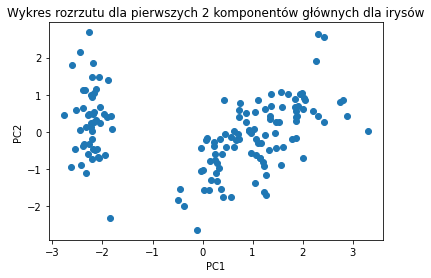

In [39]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])

plt.title("Wykres rozrzutu dla pierwszych 2 komponentów głównych dla irysów")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Reguła łokcia dla wykresu WSS od k

In [40]:
wss = []
sil_score = []

for i in range(1, 11):
    
    model = KMeans(n_clusters=i, n_init=10, random_state=7)
    model.fit(X_scaled)
    
    wss.append(model.inertia_)  # WSS
    
    if i > 1:
        sil_score.append(silhouette_score(X_scaled, model.labels_))  # silhouette


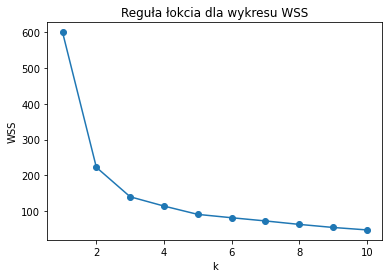

In [41]:
plt.plot(range(1, 11), wss, "-o")

plt.title("Reguła łokcia dla wykresu WSS")
plt.xlabel("k")
plt.ylabel("WSS")
plt.show()

In [42]:
# automatyczne wyznaczanie punktu przegięcia

kl = KneeLocator(range(1, 11), wss, curve="convex", direction="decreasing")
kl.elbow

3

### Klasteryzacja

In [43]:
model = KMeans(n_clusters=3, n_init=10, random_state=7)

model.fit(X_scaled)
labels = model.labels_

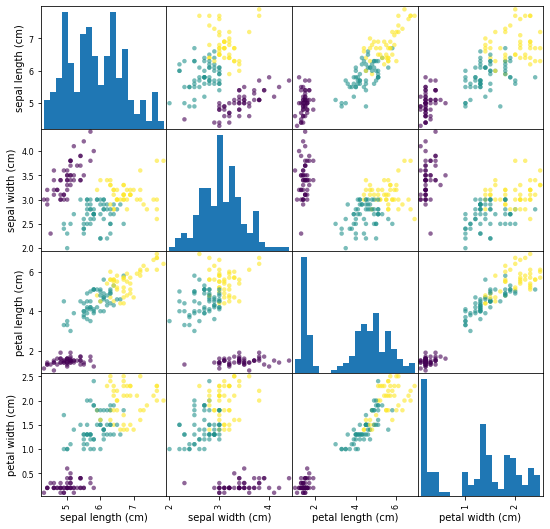

In [44]:
pd.plotting.scatter_matrix(iris_df, figsize=(9, 9), marker="o", hist_kwds={"bins": 20}, s=20, alpha=0.6, c=labels)
plt.show()

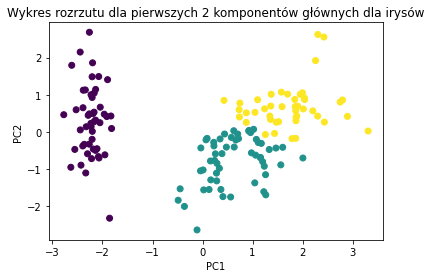

In [45]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

plt.title("Wykres rozrzutu dla pierwszych 2 komponentów głównych dla irysów")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Indeks sylwetki (_silhouette_)

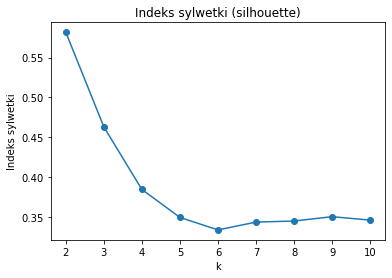

In [46]:
## wybieramy maksymalny indeks sylwetki

plt.plot(range(2, 11), sil_score, "-o")

plt.title("Indeks sylwetki (silhouette)")
plt.xlabel("k")
plt.ylabel("Indeks sylwetki")
plt.show()

In [47]:
model2 = KMeans(n_clusters=2, n_init=10, random_state=7)

model2.fit(X_scaled)
labels2 = model2.labels_

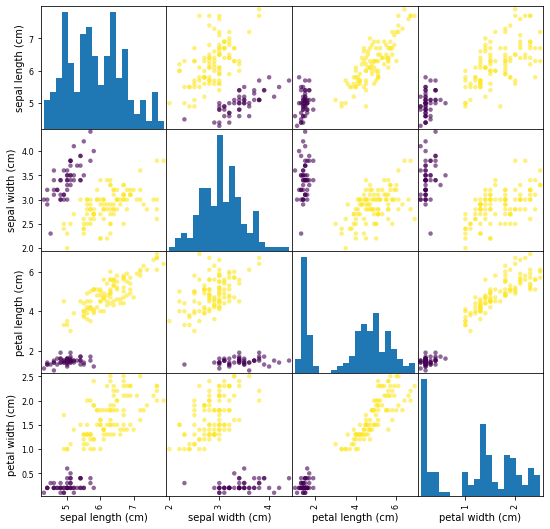

In [48]:
pd.plotting.scatter_matrix(iris_df, figsize=(9, 9), marker="o", hist_kwds={"bins": 20}, s=20, alpha=0.6, c=labels2)
plt.show()

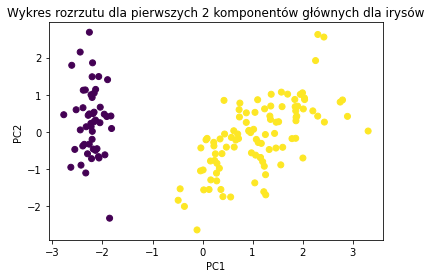

In [49]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2)

plt.title("Wykres rozrzutu dla pierwszych 2 komponentów głównych dla irysów")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Ćwiczenie 3: jednorodne grupy z rozkładu normalnego

Dla danych jednorodne grupy z rozkładu normalnego znajdź liczbę klastrów i wykonaj grupowanie k-średnich. Zwizualizuj wyniki.

In [50]:
rng = np.random.default_rng(seed=7)

X = np.vstack([rng.multivariate_normal([0, 0], [[1, 0], [0, 1]], 50),
               rng.multivariate_normal([3, 8], [[1, 0], [0, 1]], 50),
               rng.multivariate_normal([6, 4], [[1, 0], [0, 1]], 50)])

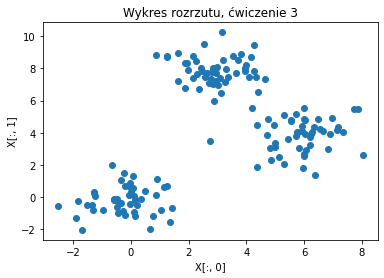

In [51]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Wykres rozrzutu, ćwiczenie 3")
plt.xlabel("X[:, 0]")
plt.ylabel("X[:, 1]")
plt.show()

In [52]:
X_scaled = StandardScaler().fit_transform(X)  # skale są do siebie zbliżone, więc ten krok można pominąć

wss = []
sil_score = []

for i in range(1, 11):
    
    model = KMeans(n_clusters=i, n_init=10, random_state=7)
    model.fit(X_scaled)
    
    wss.append(model.inertia_)  # WSS
    
    if i > 1:
        sil_score.append(silhouette_score(X_scaled, model.labels_))  # silhouette

3


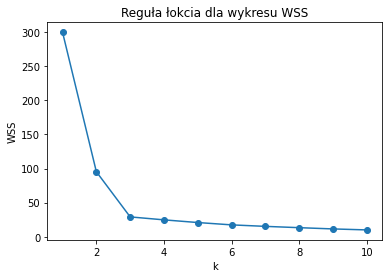

In [53]:
kl = KneeLocator(range(1, 11), wss, curve="convex", direction="decreasing")
print(kl.elbow)

plt.plot(range(1, 11), wss, "-o")

plt.title("Reguła łokcia dla wykresu WSS")
plt.xlabel("k")
plt.ylabel("WSS")
plt.show()

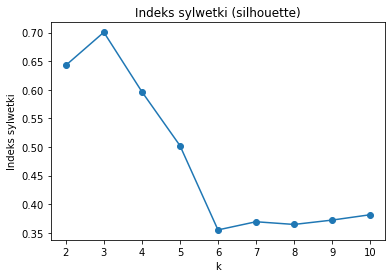

In [54]:
plt.plot(range(2, 11), sil_score, "-o")

plt.title("Indeks sylwetki (silhouette)")
plt.xlabel("k")
plt.ylabel("Indeks sylwetki")
plt.show()

In [55]:
model3 = KMeans(n_clusters=3, n_init=10, random_state=7)

model3.fit(X_scaled)
labels3 = model3.labels_
centers3 = model3.cluster_centers_

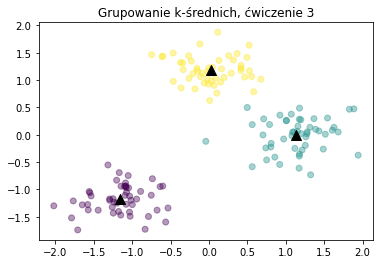

In [56]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels3, alpha=0.4)
plt.scatter(centers3[:, 0], centers3[:, 1], marker="^", c="black", s=100)

plt.title("Grupowanie k-średnich, ćwiczenie 3")
plt.show()

## Przykład 4: grupowanie k-średnich jako dekompozycja

Interesujące podobieństwo `k-średnich` i np. `PCA`. `PCA` ma przedstawić punkty jako sumę składników maksymalizującą wariancję. 
Algorytm `k-średnich` próbuje przedstawić punkty jako centrum klastra. 

W tym przykładzie przekształcimy dane make moons za pomocą klasteryzacji k-średnich 
tak żeby prosty klasyfikator liniowy
(regresja logistyczna) lepiej separował klasy.

In [57]:
X, y = make_moons(n_samples=300, noise=0.15, random_state=7)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=7)

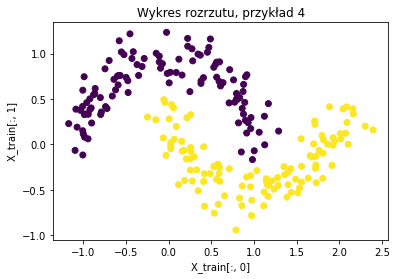

In [58]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

plt.title("Wykres rozrzutu, przykład 4")
plt.xlabel("X_train[:, 0]")
plt.ylabel("X_train[:, 1]")
plt.show()

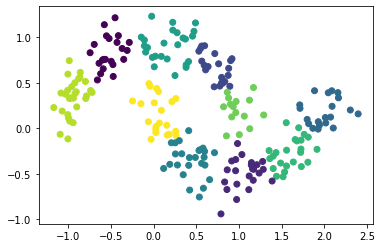

In [59]:
model = KMeans(n_clusters=10, n_init=10, random_state=7)

model.fit(X_train)
labels = model.labels_

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

In [60]:
# dla każdego punktu obliczamy odległość do każdego centrum klastra, a następnie rozszerzamy pierwotne dane

X2_train = model.transform(X_train)
X2_test = model.transform(X_test)

X2_train[:5]

array([[1.13989559, 0.98577342, 0.916489  , 1.83788943, 0.38429886,
        0.97515155, 1.43694482, 0.85102581, 1.19708696, 0.25162155],
       [1.51984603, 0.56353403, 0.89980363, 1.47880417, 0.19641718,
        1.19711374, 1.02644567, 0.584864  , 1.622095  , 0.63909621],
       [1.80504342, 0.34048251, 0.874461  , 1.07738504, 0.57727776,
        1.3459788 , 0.6295054 , 0.36423099, 1.99312701, 0.97860953],
       [1.62224302, 0.67921943, 0.54785427, 1.04030615, 0.74508907,
        1.07749313, 0.78126896, 0.03634644, 1.91436924, 0.90453886],
       [0.80936502, 1.3538524 , 0.48708613, 1.79892383, 0.9534095 ,
        0.33616231, 1.6009531 , 0.83524941, 1.21802692, 0.46868179]])

In [61]:
X_train.shape, X_test.shape, X2_train.shape, X2_test.shape

((225, 2), (75, 2), (225, 10), (75, 10))

## Ćwiczenie 4: dekompozycja k-średnich poprawia działanie regresji logistycznej 
Zbuduj modele regresji logistycznej na danych oryginalnych oraz na nowym zbiorze z przykładu 4. Porównaj
dokładność modeli za pomocą funkcji score na danych treningowych i testowych.

In [62]:
# oryginalny zbiór danych (dwa wymiary)

logreg = LogisticRegression().fit(X_train, y_train)

print(f"train_score: {logreg.score(X_train, y_train)}")
print(f"test_score: {logreg.score(X_test, y_test)}")

train_score: 0.8933333333333333
test_score: 0.8133333333333334


In [63]:
# zbiór przekształcony po klasteryzacji (10 wymiarów)

logreg2 = LogisticRegression().fit(X2_train, y_train)

print(f"train_score: {logreg2.score(X2_train, y_train)}")
print(f"test_score: {logreg2.score(X2_test, y_test)}")

train_score: 0.9466666666666667
test_score: 0.8666666666666667


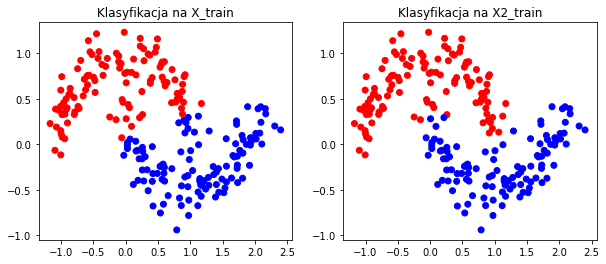

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=np.array(["red", "blue"])[np.array(logreg.predict(X_train))])
axes[0].set_title("Klasyfikacja na X_train")


axes[1].scatter(X_train[:, 0], X_train[:, 1], c=np.array(["red", "blue"])[np.array(logreg2.predict(X2_train))])
axes[1].set_title("Klasyfikacja na X2_train")

plt.show()

# Grupowanie aglomeracyjne

## Przykład 1: ilustracja działania algorytmu

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [65]:
X = np.array([[1, 1], [1, 2.5], [2, 2], [4, 4], [5, 2], [5.5, 4.5], [6, 2], [6, 4]])

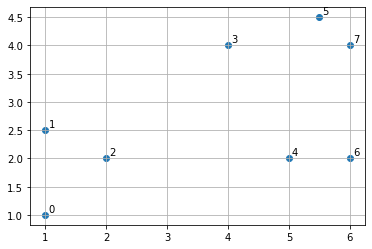

In [66]:
plt.grid()
plt.scatter(X[:, 0], X[:, 1])

for i in range(X.shape[0]):
    plt.annotate(str(i), xy=(X[i, 0], X[i, 1]), xytext=(3, 3), textcoords="offset points")
    
plt.show()

### SciPy

In [67]:
# używamy 'scipy', bo w 'sklearn' nie ma implementacji rysowania dendrogramu!

L1 = linkage(X, method="complete", metric="euclidean")
L1  # które klastry łączymy, dla jakiej odległości oraz wynik łączenia

array([[ 5.        ,  7.        ,  0.70710678,  2.        ],
       [ 4.        ,  6.        ,  1.        ,  2.        ],
       [ 1.        ,  2.        ,  1.11803399,  2.        ],
       [ 0.        , 10.        ,  1.5       ,  3.        ],
       [ 3.        ,  8.        ,  2.        ,  3.        ],
       [ 9.        , 12.        ,  2.82842712,  5.        ],
       [11.        , 13.        ,  5.83095189,  8.        ]])

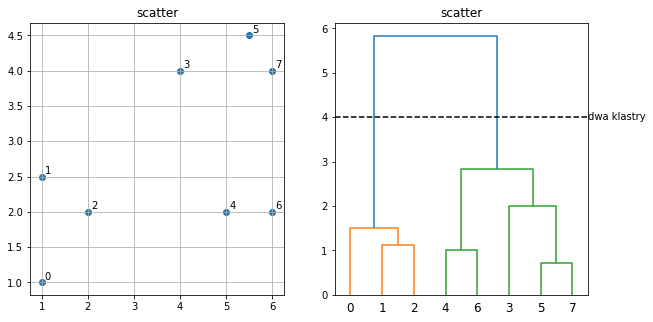

In [68]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title("scatter")

plt.grid()
plt.scatter(X[:, 0], X[:, 1])

for i in range(X.shape[0]):
    plt.annotate(str(i), xy=(X[i, 0], X[i, 1]), xytext=(3, 3), textcoords="offset points")
    
plt.subplot(122)
plt.title("scatter")

dendrogram(L1)
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [4, 4], "--", c="black")
ax.text(bounds[1], 4, "dwa klastry", va="center", fontdict={"size": 10})

plt.show()

In [69]:
clust1 = fcluster(L1, 2, criterion="maxclust")  # szukamy dwóch klastrów
clust1

array([1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [70]:
clust_h = fcluster(L1, 4, criterion="distance")  # określamy wysokość cięcia
clust_h

array([1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

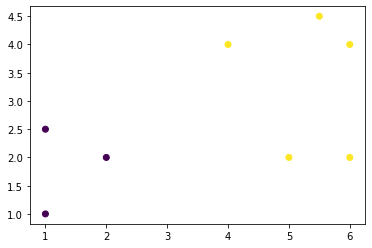

In [71]:
plt.scatter(X[:, 0], X[:, 1], c=clust1)
plt.show()

In [72]:
L2 = linkage(X, method="single", metric="euclidean")
L3 = linkage(X, method="average", metric="euclidean")
L4 = linkage(X, method="ward", metric="euclidean")

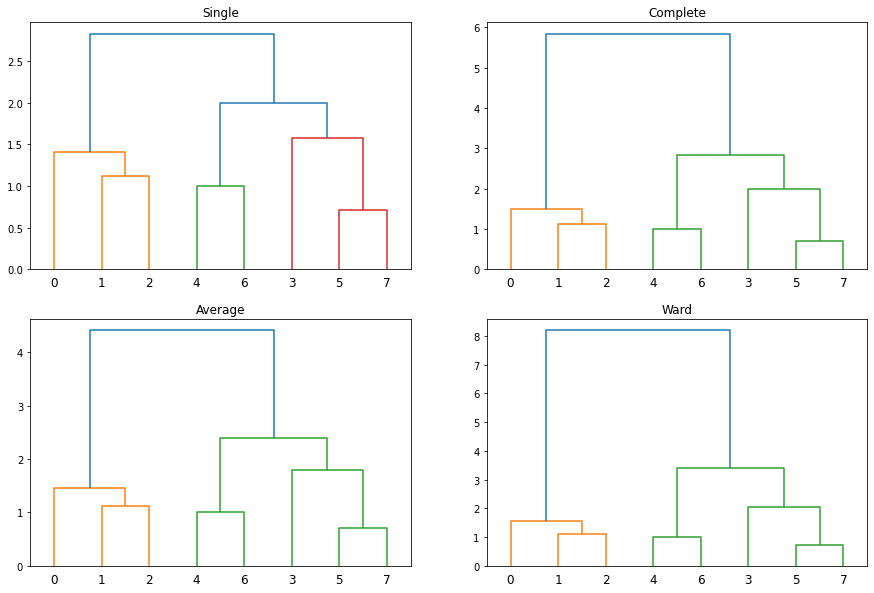

In [73]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
dendrogram(L2)
plt.title("Single")

plt.subplot(2, 2, 2)
dendrogram(L1)
plt.title("Complete")

plt.subplot(2, 2, 3)
dendrogram(L3)
plt.title("Average")

plt.subplot(2, 2, 4)
dendrogram(L4)
plt.title("Ward")

plt.show()

### Scikit-learn

In [74]:
# nie ma możliwości rysowania! (UWAGA: numeracja klastrów od 1 - w scipy jest od 0)

clust2 = AgglomerativeClustering(n_clusters=2, linkage="complete")

clust2.fit_predict(X)
print(clust2.labels_)

[1 1 1 0 0 0 0 0]


## Ćwiczenie 1: przykłady ilustrujące metody przeliczania odległości

Dla wygenerowanych danych wykonaj klasteryzację hierarchiczną dla metod `Single`, `Complete`, `Average` i `Ward`. 
Narysuj wyniki grupowań i porównaj wyniki. Pamiętaj o skalowaniu danych!

https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html

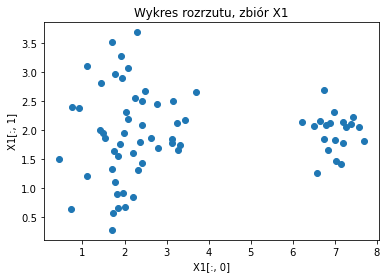

In [75]:
X1 = make_blobs(n_samples=[50, 20], n_features=2, centers=[[2, 2], [7, 2]], cluster_std=[.75, .4], random_state=7)[0]

plt.scatter(X1[:, 0], X1[:, 1])
plt.title("Wykres rozrzutu, zbiór X1")
plt.xlabel("X1[:, 0]")
plt.ylabel("X1[:, 1]")
plt.show()

In [76]:
# użycie pakietu 'sklearn' (nie potrzebujemy rysować dendrogramów)

X1 = StandardScaler().fit_transform(X1)
n_clusters = 2

linkages = ["single", "complete", "average", "ward"]
labels = []

for link in linkages:

    clust = AgglomerativeClustering(n_clusters=n_clusters, linkage=link)
    clust.fit_predict(X1)
    labels.append(clust.labels_)

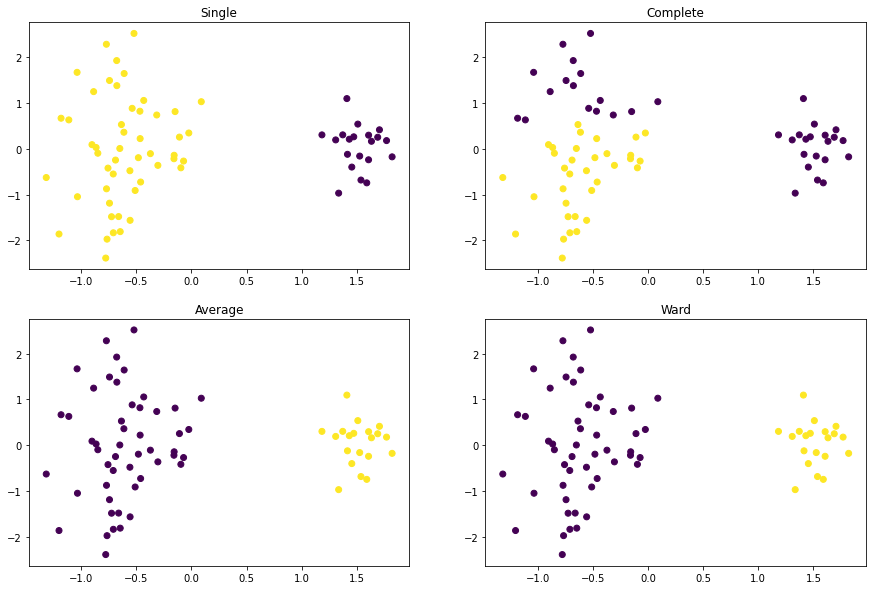

In [77]:
plt.figure(figsize=(15, 10))

for i, link in enumerate(linkages):

    plt.subplot(2, 2, i + 1)
    plt.scatter(X1[:, 0], X1[:, 1], c=labels[i])
    plt.title(str.title(link))

plt.show()

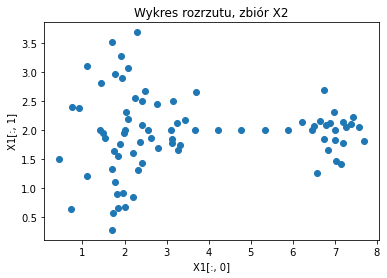

In [78]:
X2 = np.vstack([
        make_blobs(n_samples=[50, 20], n_features=2, centers=[[2, 2], [7, 2]], cluster_std=[.75, .4], random_state=7)[0],
        np.vstack([np.linspace(2, 7, 10), np.ones(10) * 2]).T
    ])

plt.scatter(X2[:, 0], X2[:, 1])
plt.title("Wykres rozrzutu, zbiór X2")
plt.xlabel("X1[:, 0]")
plt.ylabel("X1[:, 1]")
plt.show()

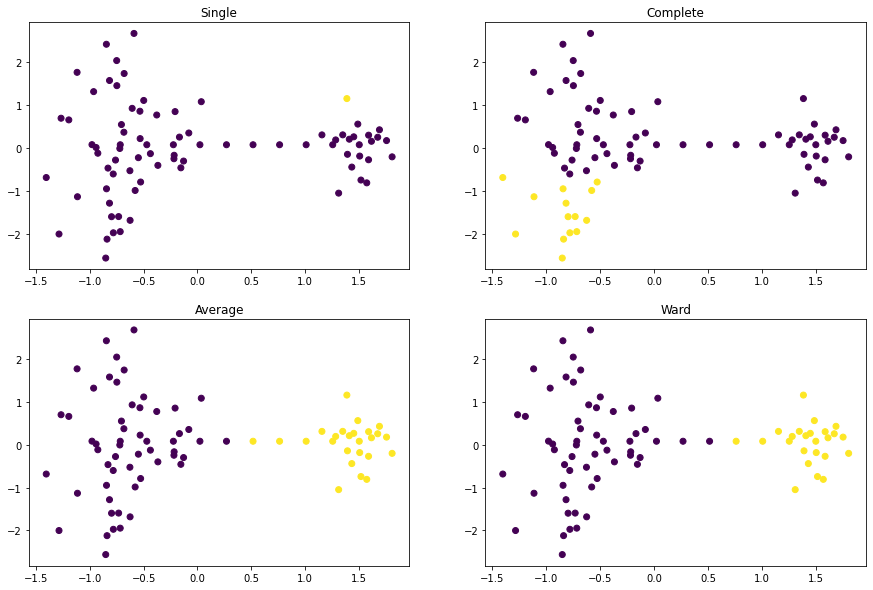

In [79]:
X2 = StandardScaler().fit_transform(X2)
n_clusters = 2

linkages = ["single", "complete", "average", "ward"]
labels = []

for link in linkages:

    clust = AgglomerativeClustering(n_clusters=n_clusters, linkage=link)
    clust.fit_predict(X2)
    labels.append(clust.labels_)
    
plt.figure(figsize=(15, 10))

for i, link in enumerate(linkages):

    plt.subplot(2, 2, i + 1)
    plt.scatter(X2[:, 0], X2[:, 1], c=labels[i])
    plt.title(str.title(link))

plt.show()

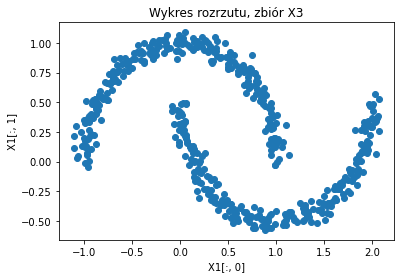

In [80]:
noisy_moons = make_moons(n_samples=500, noise=0.05)
X3 = noisy_moons[0]

plt.scatter(X3[:, 0], X3[:, 1])
plt.title("Wykres rozrzutu, zbiór X3")
plt.xlabel("X1[:, 0]")
plt.ylabel("X1[:, 1]")
plt.show()

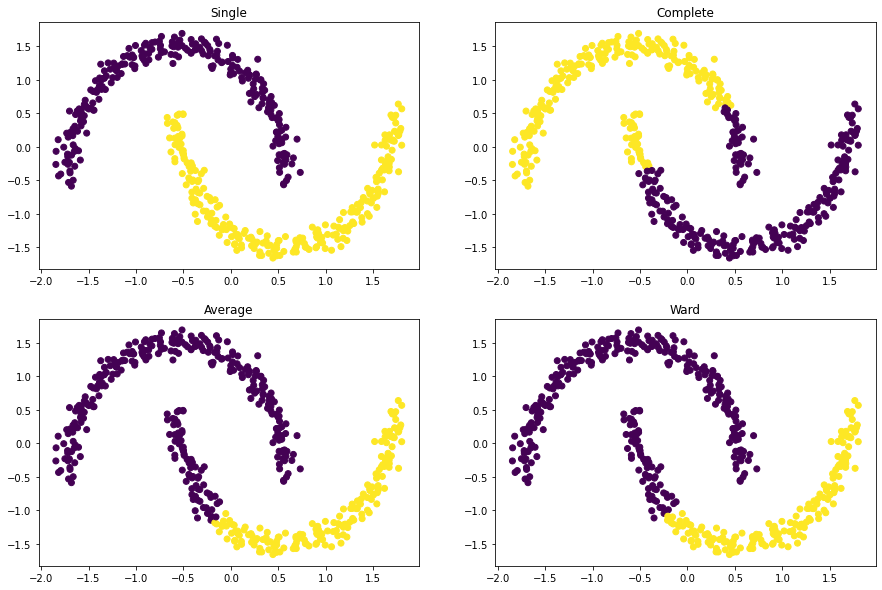

In [81]:
X3 = StandardScaler().fit_transform(X3)
n_clusters = 2

linkages = ["single", "complete", "average", "ward"]
labels = []

for link in linkages:

    clust = AgglomerativeClustering(n_clusters=n_clusters, linkage=link)
    clust.fit_predict(X3)
    labels.append(clust.labels_)
    
plt.figure(figsize=(15, 10))

for i, link in enumerate(linkages):

    plt.subplot(2, 2, i + 1)
    plt.scatter(X3[:, 0], X3[:, 1], c=labels[i])
    plt.title(str.title(link))

plt.show()

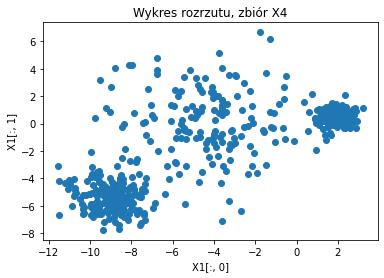

In [82]:
varied_normal = make_blobs(n_samples=500, cluster_std=[1.0, 2.5, 0.5], random_state=170)
X4 = varied_normal[0]

plt.scatter(X4[:, 0], X4[:, 1])
plt.title("Wykres rozrzutu, zbiór X4")
plt.xlabel("X1[:, 0]")
plt.ylabel("X1[:, 1]")
plt.show()

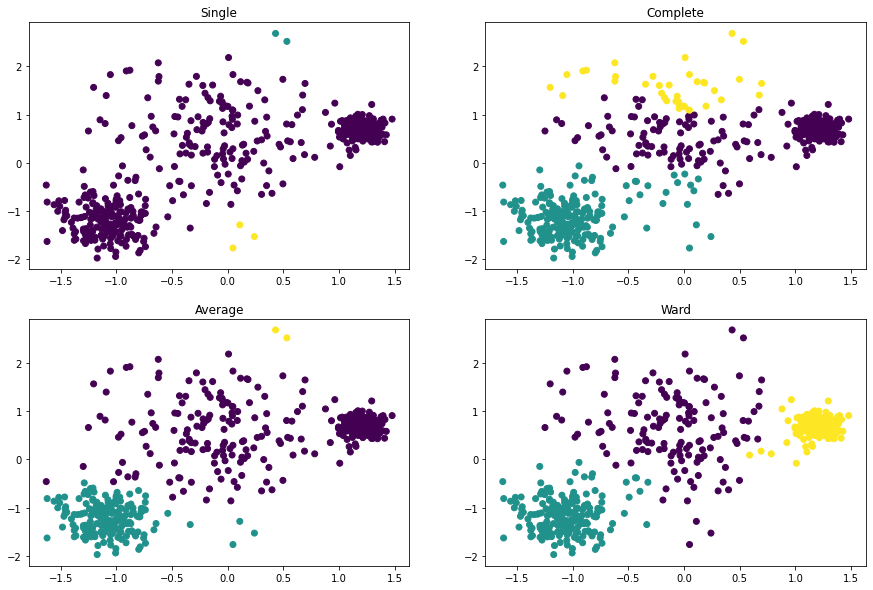

In [83]:
X4 = StandardScaler().fit_transform(X4)
n_clusters = 3

linkages = ["single", "complete", "average", "ward"]
labels = []

for link in linkages:

    clust = AgglomerativeClustering(n_clusters=n_clusters, linkage=link)
    clust.fit_predict(X4)
    labels.append(clust.labels_)
    
plt.figure(figsize=(15, 10))

for i, link in enumerate(linkages):

    plt.subplot(2, 2, i + 1)
    plt.scatter(X4[:, 0], X4[:, 1], c=labels[i])
    plt.title(str.title(link))

plt.show()

In [84]:
type(X3)

numpy.ndarray

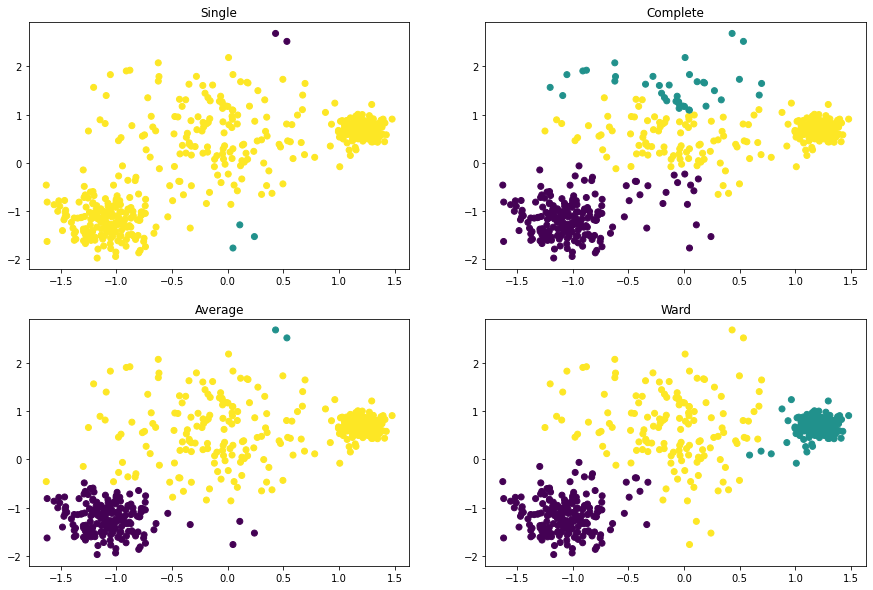

In [85]:
# inny sposób (pakiet SciPy):

L1 = linkage(X4, method="single", metric="euclidean")
L2 = linkage(X4, method="complete", metric="euclidean")
L3 = linkage(X4, method="average", metric="euclidean")
L4 = linkage(X4, method="ward", metric="euclidean")

clust1 = fcluster(L1, 3, criterion="maxclust")
clust2 = fcluster(L2, 3, criterion="maxclust")
clust3 = fcluster(L3, 3, criterion="maxclust")
clust4 = fcluster(L4, 3, criterion="maxclust")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(X4[:, 0], X4[:, 1], c=clust1)
plt.title("Single")

plt.subplot(2, 2, 2)
plt.scatter(X4[:, 0], X4[:, 1], c=clust2)
plt.title("Complete")

plt.subplot(2, 2, 3)
plt.scatter(X4[:, 0], X4[:, 1], c=clust3)
plt.title("Average")

plt.subplot(2, 2, 4)
plt.scatter(X4[:, 0], X4[:, 1], c=clust4)
plt.title("Ward")

plt.show()

## Ćwiczenie 2: `Irysy`

Dla danych Irysy wykonaj klasteryzację hierarchiczną dla metod `Single`, `Complete`, `Average` i `Ward`. 
Wybierz liczbę klastrów, narysuj wyniki grupowań i porównaj wyniki. Pamiętaj o skalowaniu danych!

In [86]:
iris = load_iris()

In [87]:
X_scaled = StandardScaler().fit_transform(iris.data)

In [88]:
L1 = linkage(X_scaled, method="single", metric="euclidean")
L2 = linkage(X_scaled, method="complete", metric="euclidean")
L3 = linkage(X_scaled, method="average", metric="euclidean")
L4 = linkage(X_scaled, method="ward", metric="euclidean")

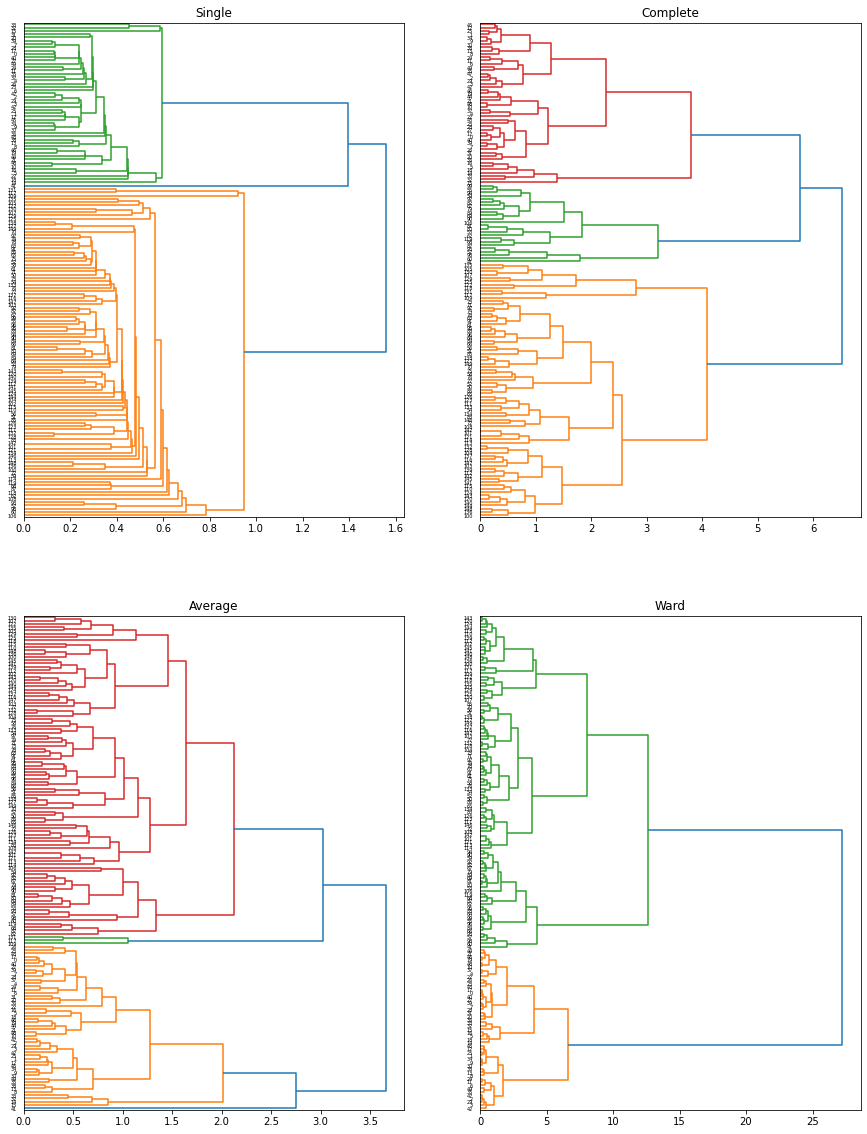

In [89]:
plt.figure(figsize=(15, 20))

plt.subplot(2, 2, 1)
dendrogram(L1, orientation="right")
plt.title("Single")

plt.subplot(2, 2, 2)
dendrogram(L2, orientation="right")
plt.title("Complete")

plt.subplot(2, 2, 3)
dendrogram(L3, orientation="right")
plt.title("Average")

plt.subplot(2, 2, 4)
dendrogram(L4, orientation="right")
plt.title("Ward")

plt.show()

In [90]:
clust1 = fcluster(L1, 3, criterion="maxclust")
clust2 = fcluster(L2, 3, criterion="maxclust")
clust3 = fcluster(L3, 4, criterion="maxclust")
clust4 = fcluster(L4, 2, criterion="maxclust")

In [91]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

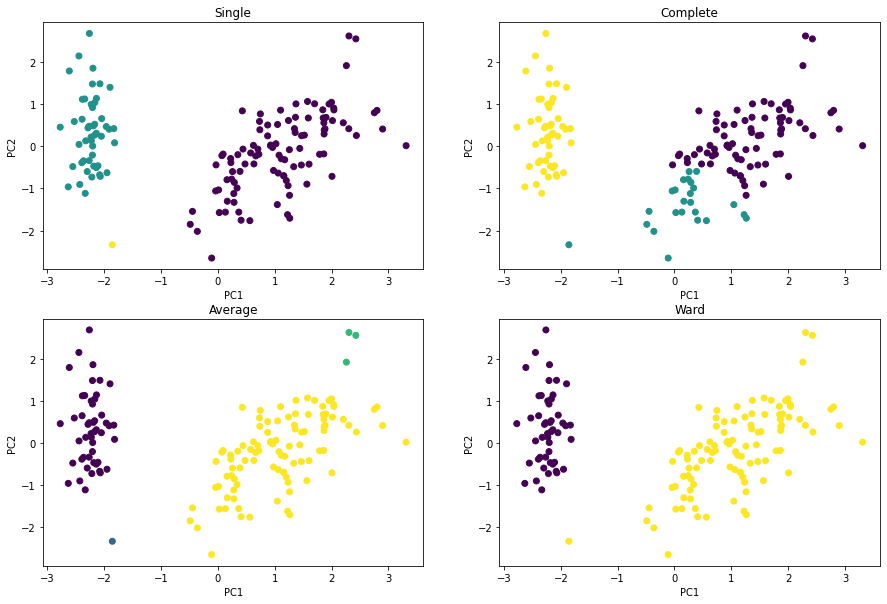

In [92]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.scatter(X_pca[:,0], X_pca[:,1], c = clust1)
plt.title("Single")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(222)
plt.scatter(X_pca[:,0], X_pca[:,1], c = clust2)
plt.title("Complete")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(223)
plt.scatter(X_pca[:,0], X_pca[:,1], c = clust3)
plt.title("Average")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(224)
plt.scatter(X_pca[:,0], X_pca[:,1], c = clust4)
plt.title("Ward")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

## Przykład 2: Grupowanie z ograniczeniami

Przykład pokazuje jak wprowadzenie ograniczeń na połączenia obserwacji w klastry może wpływać na wynik grupowania.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [93]:
X = make_swiss_roll(1500, noise=.05)[0]
X[:, 1] *= 0.5  # odchudzanie rolki

In [94]:
X.shape  # trójwymiarowy zbiór danych

(1500, 3)

In [95]:
# brak ograniczeń na bliskość punktów trafiających do jednego klastra

model1 = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
label1 = model1.labels_

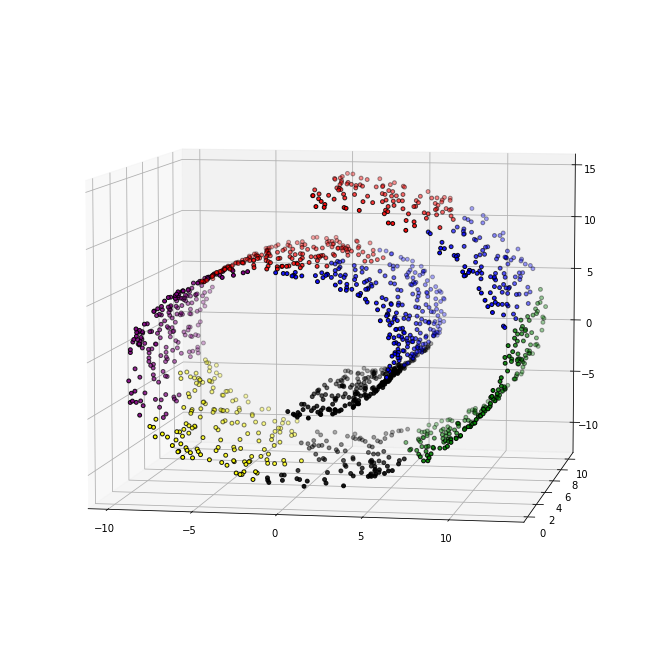

In [96]:
fig1 = plt.figure(figsize=(12, 12))
ax1 = plt.axes(projection="3d", elev=7, azim=-80)

for i in np.unique(label1):
    ax1.scatter(X[label1 == i, 0], X[label1 == i, 1], X[label1 == i, 2],
               color = np.array(["red", "blue", "green", "black", "yellow", "purple"])[i],
               s=15, edgecolor="black")
    
plt.show()

### Macierze połączeń (connectivity matrix)

In [97]:
# macierz połączeń na podstawie algorytmu 'k najmniejszych sąsiadów'

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
type(connectivity)

scipy.sparse._csr.csr_matrix

In [98]:
connectivity.shape  # liczba punktów

(1500, 1500)

In [99]:
connectivity.count_nonzero()  # liczba sąsiadów x liczba punktów

15000

In [100]:
model2 = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage="ward").fit(X)
label2 = model2.labels_

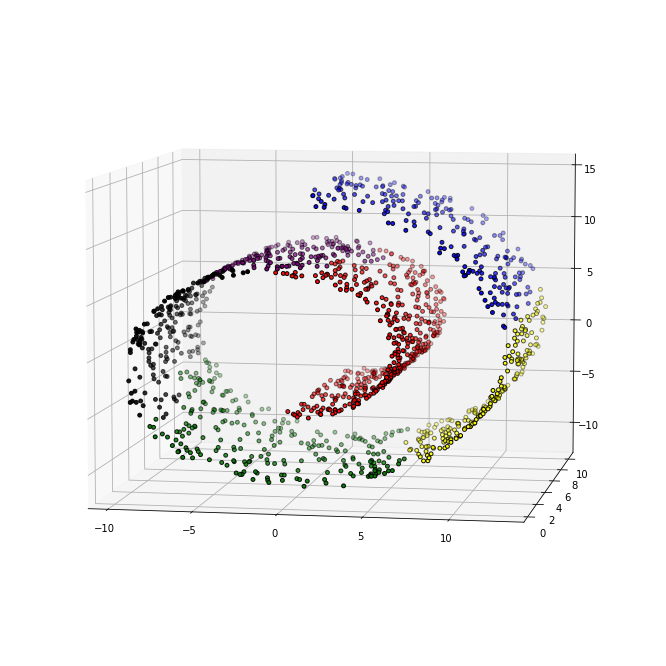

In [101]:
# do danego klastra musi należeć k-najbliższych punktów (k=10) --> otrzymujemy lepsze grupowanie

fig1 = plt.figure(figsize=(12, 12))
ax1 = plt.axes(projection="3d", elev=7, azim=-80)

for i in np.unique(label2):
    ax1.scatter(X[label2 == i, 0], X[label2 == i, 1], X[label2 == i, 2],
               color = np.array(["red", "blue", "green", "black", "yellow", "purple"])[i],
               s=15, edgecolor="black")
    
plt.show()

# DBSCAN

## Przykład 1: małe dane `blobs`

Dla wygenerowanych danych wykonaj grupowanie `DBSCAN`: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [102]:
X = make_blobs(random_state=0, n_samples=12)[0]

In [103]:
# celowo nie skalujemy tu danych, bo zbiór danych jest "porządny"

model1 = DBSCAN().fit(X)

labels1 = model1.labels_
labels1  # wszystkie obserwacje są odstające (wartość -1), bo zbiór jest zbyt mało liczny!

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### Zależność algorytmu od parametrów `min_samples` i `eps`

Dla `min_samples = [2, 3, 5]` oraz `eps = [1, 1.5, 2, 3]` wykonaj klasteryzację `DBSCAN`, narysuj wyniki na wykresach i przeanalizuj wpływ parametrów na działanie algorytmu.

In [104]:
min_samples = [2, 3, 5]
eps = [1, 1.5, 2, 3]

prod = list(product(min_samples, eps))
print(prod)

[(2, 1), (2, 1.5), (2, 2), (2, 3), (3, 1), (3, 1.5), (3, 2), (3, 3), (5, 1), (5, 1.5), (5, 2), (5, 3)]


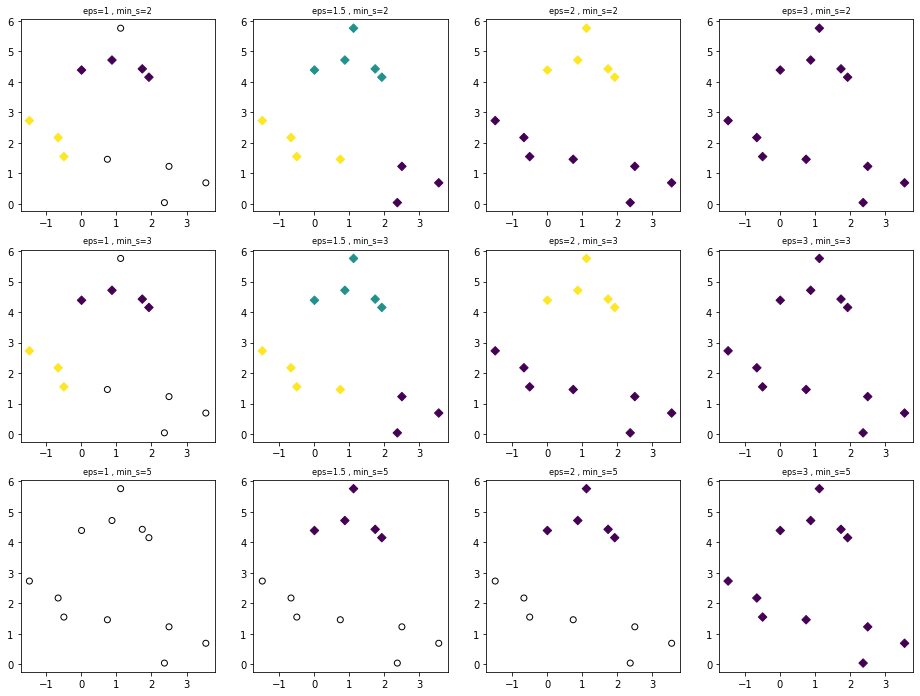

In [105]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
ax = axes.ravel()  # rozwinięcie macierzy wykresów do postaci listy --> umożliwia iterację w pętli

for i in range(len(prod)):
    
    model = DBSCAN(eps=prod[i][1], min_samples=prod[i][0]).fit(X)
    labels = model.labels_
    
    # czy istnieją obserwacje odstające?
    if any(labels == -1):
        ax[i].scatter(X[labels == -1, 0], X[labels == -1, 1], facecolors="none", edgecolors="black", marker="o")
    
    if any(labels > -1):
        ax[i].scatter(X[labels > -1, 0], X[labels > -1, 1], c=labels[labels > -1], marker="D")
        
    ax[i].set_title("eps=" + str(prod[i][1]) + " , min_s=" + str(prod[i][0]), fontsize=8)
    
plt.show()

## Ćwiczenie 1: dane `noisy moons` i `varied normal`

Dla poniższych zbiorów danych `noisy moons` i `varied normal` wykonaj klastrowanie `DBSCAN` i zwizualizuj wyniki. Użyj różnych parametrów `min_samples` i `eps` i porównaj wyniki. Pamiętaj o skalowaniu danych!

In [106]:
noisy_moons = make_moons(n_samples=500, noise=0.05)
varied_normal = make_blobs(n_samples=500, cluster_std=[1.0, 2.5, 0.5], random_state=170)

X1 = noisy_moons[0]
X2 = varied_normal[0]

In [107]:
X1 = StandardScaler().fit_transform(X1)
X2 = StandardScaler().fit_transform(X2)

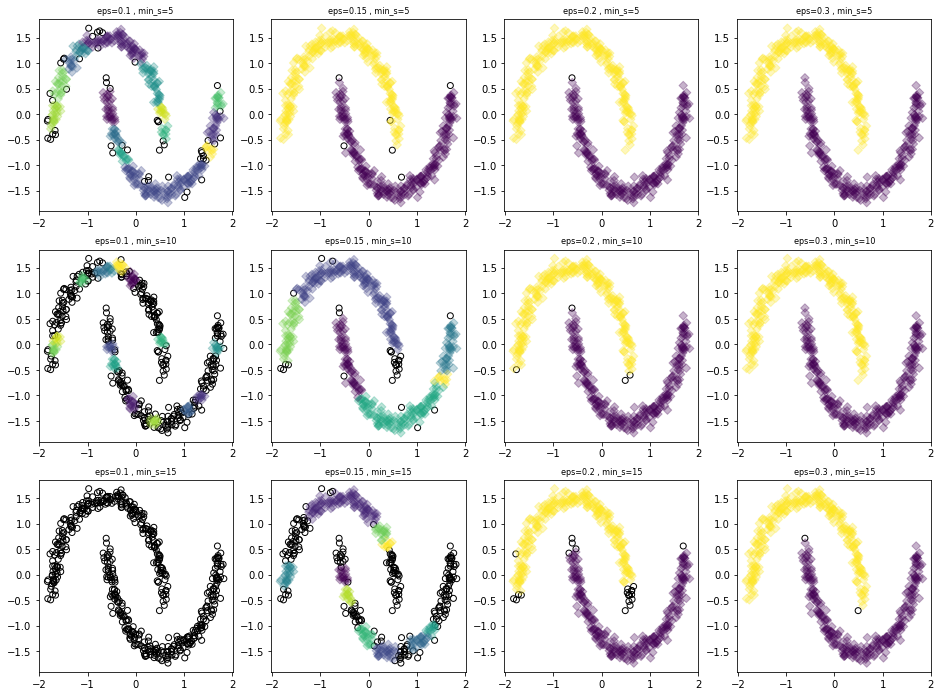

In [108]:
# działa dobrze również dla parametrów domyślnych: eps=0.5, min_samples=5

min_samples = [5, 10, 15]
eps = [0.1, 0.15, 0.2, 0.3]

prod = list(product(min_samples, eps))

fig, axes = plt.subplots(nrows=len(min_samples), ncols=len(eps), figsize=(16, 12))
ax = axes.ravel()

for i in range(len(prod)):
    
    model = DBSCAN(eps=prod[i][1], min_samples=prod[i][0]).fit(X1)
    labels = model.labels_
    
    # czy istnieją obserwacje odstające?
    if any(labels == -1):
        ax[i].scatter(X1[labels == -1, 0], X1[labels == -1, 1], facecolors="none", edgecolors="black", marker="o")
    
    if any(labels > -1):
        ax[i].scatter(X1[labels > -1, 0], X1[labels > -1, 1], c=labels[labels > -1], marker="D", alpha=0.3)
        
    ax[i].set_title("eps=" + str(prod[i][1]) + " , min_s=" + str(prod[i][0]), fontsize=8)
    
plt.show()

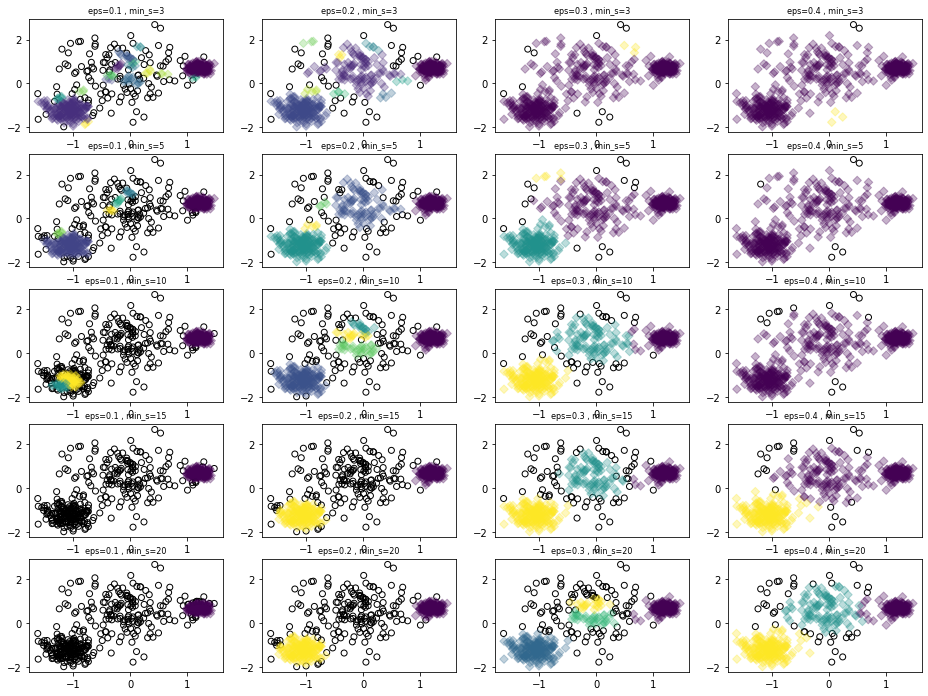

In [109]:
min_samples = [3, 5, 10, 15, 20]
eps = [0.1, 0.2, 0.3, 0.4]

prod = list(product(min_samples, eps))

fig, axes = plt.subplots(nrows=len(min_samples), ncols=len(eps), figsize=(16, 12))
ax = axes.ravel()

for i in range(len(prod)):
    
    model = DBSCAN(eps=prod[i][1], min_samples=prod[i][0]).fit(X2)
    labels = model.labels_
    
    # czy istnieją obserwacje odstające?
    if any(labels == -1):
        ax[i].scatter(X2[labels == -1, 0], X2[labels == -1, 1], facecolors="none", edgecolors="black", marker="o")
    
    if any(labels > -1):
        ax[i].scatter(X2[labels > -1, 0], X2[labels > -1, 1], c=labels[labels > -1], marker="D", alpha=0.3)
        
    ax[i].set_title("eps=" + str(prod[i][1]) + " , min_s=" + str(prod[i][0]), fontsize=8)
    
plt.show()

## Przykład 2: metoda wyboru `eps`

Wybierz parametr `eps` dla danych `varied normal` za pomocą wykresu łokcia dla odległości do
k najbliższych sąsiadów.

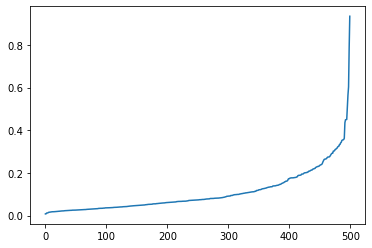

In [110]:
min_samples = 4 # min_samples = 2 x dim(X)

model_knn = NearestNeighbors(n_neighbors=min_samples).fit(X2)

distances = model_knn.kneighbors(X2)[0]
distances = np.sort(distances[:, -1])

plt.plot(distances)
plt.show()

In [111]:
kl = KneeLocator(range(0, len(distances)), distances,
                 curve="convex", direction="increasing")

kl.elbow  # UWAGA: nie jest do dobra wartość, bo krzywa nie jest gładka!

494

In [112]:
# krzywa jest rosnąca i wypukła, ale nie jest gładka (więc robimy interpolację wielomianem)

kl = KneeLocator(range(0, len(distances)), distances,
                 curve="convex", direction="increasing", interp_method="polynomial")

kl.elbow

436

In [113]:
eps = distances[436]
eps

0.21323411935046202

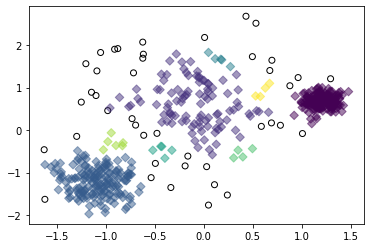

In [114]:
model = DBSCAN(eps=eps, min_samples=min_samples).fit(X2)
labels = model.labels_
    
# czy istnieją obserwacje odstające?
if any(labels == -1):
    plt.scatter(X2[labels == -1, 0], X2[labels == -1, 1], facecolors="none", edgecolors="black", marker="o")

if any(labels > -1):
    plt.scatter(X2[labels > -1, 0], X2[labels > -1, 1], c=labels[labels > -1], marker="D", alpha=0.5)

## Ćwiczenie 2: `Irysy`

Dla danych `Irysy` wykonaj grupowanie `DBSCAN` i dobierz parametry modelu. Przedstaw wyniki na wykresie.

https://scikit-learn.org/stable/modules/clustering.html

In [115]:
iris = load_iris()

In [116]:
X_scaled = StandardScaler().fit_transform(iris.data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

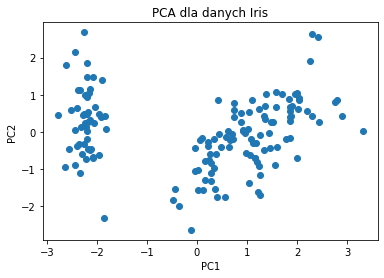

In [117]:
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA dla danych Iris")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

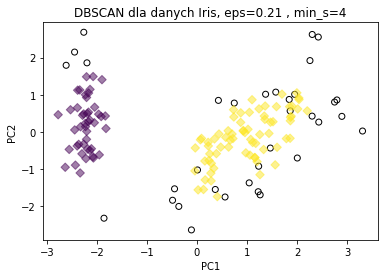

In [118]:
model = DBSCAN().fit(X_scaled)
labels = model.labels_
    
# czy istnieją obserwacje odstające?
if any(labels == -1):
    plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1], facecolors="none", edgecolors="black", marker="o")

if any(labels > -1):
    plt.scatter(X_pca[labels > -1, 0], X_pca[labels > -1, 1], c=labels[labels > -1], marker="D", alpha=0.5)
    
plt.title("DBSCAN dla danych Iris, eps=" + str(round(eps, 2)) + " , min_s=" + str(min_samples))
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()  # istnieje dużo obserwacji odstających

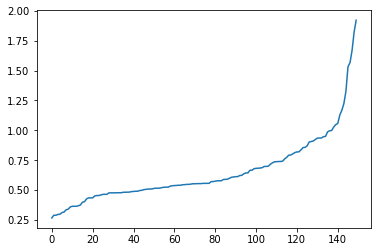

In [119]:
min_samples = 8 # min_samples = 2 x dim(X) --> zaś dane Iris są 4-wymiarowe

model_knn = NearestNeighbors(n_neighbors=min_samples).fit(X_scaled)

distances = model_knn.kneighbors(X_scaled)[0]
distances = np.sort(distances[:, -1])

plt.plot(distances)
plt.show()

In [120]:
kl = KneeLocator(range(0, len(distances)), distances,
                 curve="convex", direction="increasing", interp_method="polynomial")

print(kl.elbow)

eps = distances[kl.elbow]

130


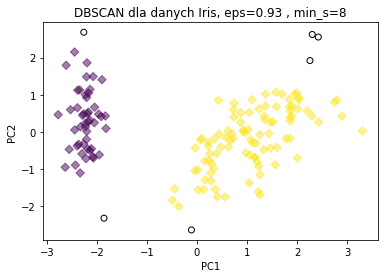

In [121]:
# model = DBSCAN(eps=eps, min_samples=2).fit(X_scaled)  # min_samples = 2, ..., 8
model = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
labels = model.labels_
    
# czy istnieją obserwacje odstające?
if any(labels == -1):
    plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1], facecolors="none", edgecolors="black", marker="o")

if any(labels > -1):
    plt.scatter(X_pca[labels > -1, 0], X_pca[labels > -1, 1], c=labels[labels > -1], marker="D", alpha=0.5)
    
plt.title("DBSCAN dla danych Iris, eps=" + str(round(eps, 2)) + " , min_s=" + str(min_samples))
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

# Źródła:

Hastie, Trevor, et al. The elements of statistical learning: data mining, inference, and prediction. Ed. 2. New York: springer, 2009.

Muller, Andreas, et al. Machine learning, Python i data science, Wprowadzenie. Helion, 2021.

http://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/

https://www.learndatasci.com/glossary/hierarchical-clustering/

https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

https://pbiecek.github.io/NaPrzelajDataMiningR/part-3.html#part_31
